In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("daily_expense_data.csv")


In [4]:
import pandas as pd
df = pd.read_csv("daily_expense_data.csv")
df.head()


,Date,Category,Amount,Payment_Mode,Mood,Reason,Time_of_Day,Planned
0,1/1/2025,Food,120,UPI,Happy,Need,Morning,Yes
1,1/1/2025,Travel,60,UPI,Neutral,Need,Morning,Yes
2,1/2/2025,Shopping,450,UPI,Stressed,Stress,Night,No
3,1/3/2025,Food,200,Cash,Happy,Convenience,Evening,No
4,1/3/2025,Entertainment,300,UPI,Happy,Leisure,Night,No


In [3]:
df["Date"] = pd.to_datetime(df["Date"])
df.isnull().sum()


Date            0
Category        0
Amount          0
Payment_Mode    0
Mood            0
Reason          0
Time_of_Day     0
Planned         0
dtype: int64

In [4]:
total_spent = df["Amount"].sum()
print("Total amount spent:", total_spent)


Total amount spent: 8845


In [5]:
category_spend = df.groupby("Category")["Amount"].sum()
category_spend


Category
Entertainment    2290
Food             2495
Shopping         3450
Travel            610
Name: Amount, dtype: int64

In [5]:
category_spend = df.groupby("Category")["Amount"].sum()
category_spend


Category
Entertainment    2290
Food             2495
Shopping         3450
Travel            610
Name: Amount, dtype: int64

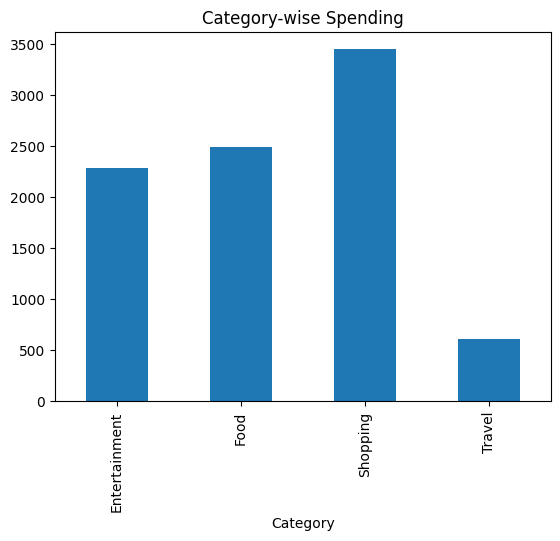

In [6]:
import matplotlib.pyplot as plt
category_spend.plot(kind="bar", title="Category-wise Spending")
plt.show()


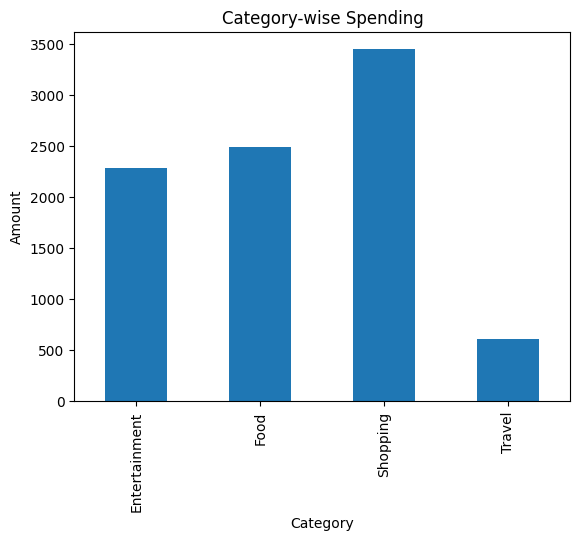

In [7]:
category_spend.plot(kind="bar", title="Category-wise Spending")
plt.ylabel("Amount")
plt.show()


In [8]:
mood_spend = df.groupby("Mood")["Amount"].mean()
mood_spend


Mood
Happy       234.666667
Neutral     146.111111
Stressed    501.250000
Name: Amount, dtype: float64

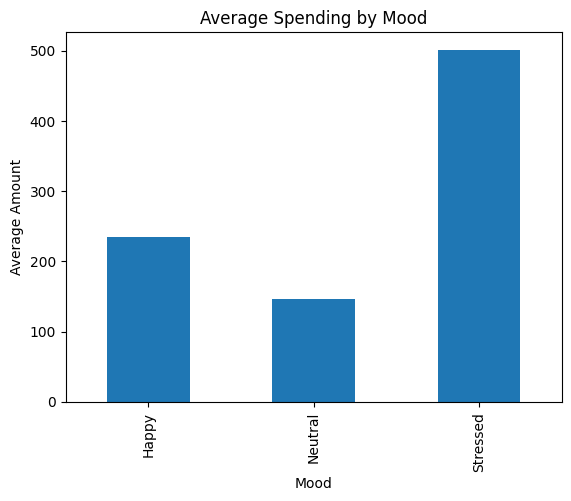

In [9]:
mood_spend.plot(kind="bar", title="Average Spending by Mood")
plt.ylabel("Average Amount")
plt.show()


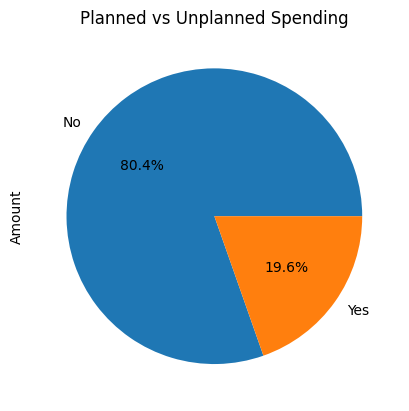

In [10]:
planned_spend = df.groupby("Planned")["Amount"].sum()
planned_spend
planned_spend.plot(kind="pie", autopct="%1.1f%%", title="Planned vs Unplanned Spending")
plt.show()

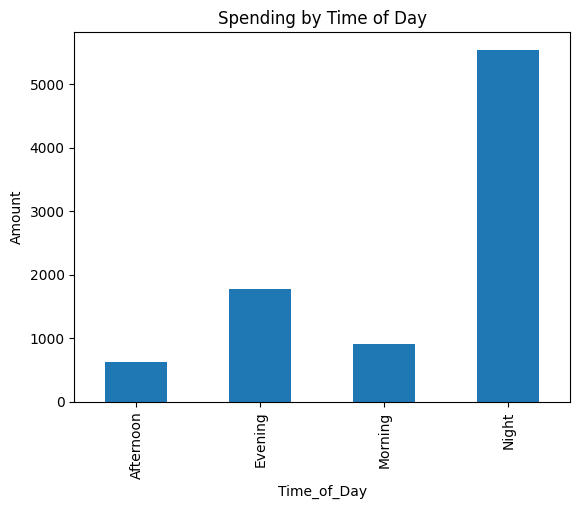

In [11]:
time_spend = df.groupby("Time_of_Day")["Amount"].sum()
time_spend
time_spend.plot(kind="bar", title="Spending by Time of Day")
plt.ylabel("Amount")
plt.show()


In [12]:
df["Date"] = pd.to_datetime(df["Date"])
df["Day"] = df["Date"].dt.day_name()
df.head()


,Date,Category,Amount,Payment_Mode,Mood,Reason,Time_of_Day,Planned,Day
0,2025-01-01,Food,120,UPI,Happy,Need,Morning,Yes,Wednesday
1,2025-01-01,Travel,60,UPI,Neutral,Need,Morning,Yes,Wednesday
2,2025-01-02,Shopping,450,UPI,Stressed,Stress,Night,No,Thursday
3,2025-01-03,Food,200,Cash,Happy,Convenience,Evening,No,Friday
4,2025-01-03,Entertainment,300,UPI,Happy,Leisure,Night,No,Friday


In [13]:
df["Expense_Type"] = df["Reason"].apply(
    lambda x: "Impulse" if x in ["Stress", "Convenience", "Leisure"] else "Essential"
)
df.head()


,Date,Category,Amount,Payment_Mode,Mood,Reason,Time_of_Day,Planned,Day,Expense_Type
0,2025-01-01,Food,120,UPI,Happy,Need,Morning,Yes,Wednesday,Essential
1,2025-01-01,Travel,60,UPI,Neutral,Need,Morning,Yes,Wednesday,Essential
2,2025-01-02,Shopping,450,UPI,Stressed,Stress,Night,No,Thursday,Impulse
3,2025-01-03,Food,200,Cash,Happy,Convenience,Evening,No,Friday,Impulse
4,2025-01-03,Entertainment,300,UPI,Happy,Leisure,Night,No,Friday,Impulse


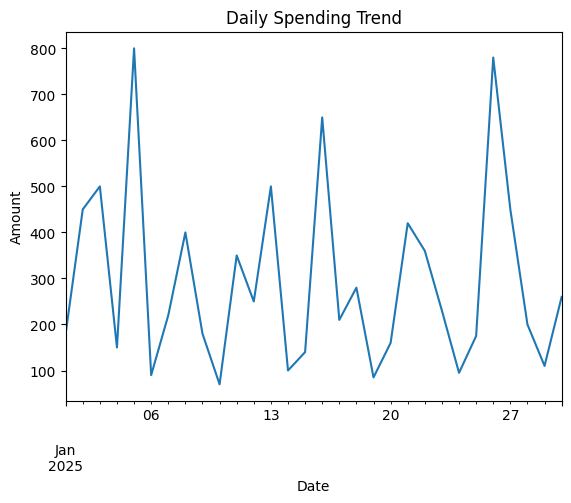

In [14]:
daily_trend = df.groupby("Date")["Amount"].sum()
daily_trend.plot(kind="line", title="Daily Spending Trend")
plt.ylabel("Amount")
plt.show()


In [15]:
#Spending patterns differ significantly between weekdays and weekends
weekday_spend = df.groupby("Day")["Amount"].mean()
weekday_spend


Day
Friday       175.000000
Monday       300.000000
Saturday     238.750000
Sunday       478.750000
Thursday     354.000000
Tuesday      235.000000
Wednesday    198.333333
Name: Amount, dtype: float64

In [17]:
def risk_score(row):
    score = 0
    if row["Planned"] == "No":
        score += 2
    if row["Mood"] == "Stressed":
        score += 2
    if row["Time_of_Day"] == "Night":
        score += 1
    return score

df["Risk_Score"] = df.apply(risk_score, axis=1)
df.head()


,Date,Category,Amount,Payment_Mode,Mood,Reason,Time_of_Day,Planned,Day,Expense_Type,Risk_Score
0,2025-01-01,Food,120,UPI,Happy,Need,Morning,Yes,Wednesday,Essential,0
1,2025-01-01,Travel,60,UPI,Neutral,Need,Morning,Yes,Wednesday,Essential,0
2,2025-01-02,Shopping,450,UPI,Stressed,Stress,Night,No,Thursday,Impulse,5
3,2025-01-03,Food,200,Cash,Happy,Convenience,Evening,No,Friday,Impulse,2
4,2025-01-03,Entertainment,300,UPI,Happy,Leisure,Night,No,Friday,Impulse,3


In [18]:
df.groupby("Risk_Score")["Amount"].mean()

Risk_Score
0    123.928571
2    261.666667
3    382.500000
5    501.250000
Name: Amount, dtype: float64

In [19]:
#Stress and unplanned behavior show positive correlation with higher spending.
df_encoded = df.copy()
df_encoded["Planned"] = df_encoded["Planned"].map({"Yes":1, "No":0})
df_encoded["Stress"] = df_encoded["Mood"].apply(lambda x: 1 if x=="Stressed" else 0)

df_encoded[["Amount","Planned","Stress","Risk_Score"]].corr()


,Amount,Planned,Stress,Risk_Score
Amount,1.000000,-0.696284,0.672160,0.803862
Planned,-0.696284,1.000000,-0.509175,-0.868452
Stress,0.672160,-0.509175,1.000000,0.852803
Risk_Score,0.803862,-0.868452,0.852803,1.000000


In [20]:
df.to_csv("expense_analysis_final.csv", index=False)


In [1]:
import sqlite3
import pandas as pd


In [2]:
df = pd.read_csv("daily_expense_data.csv")
df.head()


,Date,Category,Amount,Payment_Mode,Mood,Reason,Time_of_Day,Planned
0,1/1/2025,Food,120,UPI,Happy,Need,Morning,Yes
1,1/1/2025,Travel,60,UPI,Neutral,Need,Morning,Yes
2,1/2/2025,Shopping,450,UPI,Stressed,Stress,Night,No
3,1/3/2025,Food,200,Cash,Happy,Convenience,Evening,No
4,1/3/2025,Entertainment,300,UPI,Happy,Leisure,Night,No


In [3]:
conn = sqlite3.connect("expense_analysis.db")


In [4]:
df.to_sql("expenses", conn, if_exists="replace", index=False)


32

In [5]:
query = "SELECT * FROM expenses LIMIT 5"
pd.read_sql(query, conn)


,Date,Category,Amount,Payment_Mode,Mood,Reason,Time_of_Day,Planned
0,1/1/2025,Food,120,UPI,Happy,Need,Morning,Yes
1,1/1/2025,Travel,60,UPI,Neutral,Need,Morning,Yes
2,1/2/2025,Shopping,450,UPI,Stressed,Stress,Night,No
3,1/3/2025,Food,200,Cash,Happy,Convenience,Evening,No
4,1/3/2025,Entertainment,300,UPI,Happy,Leisure,Night,No


In [6]:
pd.read_sql("""
SELECT Category, SUM(Amount) AS Total_Spent
FROM expenses
GROUP BY Category
ORDER BY Total_Spent DESC
""", conn)


,Category,Total_Spent
0,Shopping,3450
1,Food,2495
2,Entertainment,2290
3,Travel,610


In [7]:
pd.read_sql("""
SELECT 
    Category,
    SUM(Amount) AS Total_Spent
FROM expenses
GROUP BY Category
ORDER BY Total_Spent DESC;
""", conn)


,Category,Total_Spent
0,Shopping,3450
1,Food,2495
2,Entertainment,2290
3,Travel,610


In [8]:
pd.read_sql("""
SELECT 
    Mood,
    ROUND(AVG(Amount), 2) AS Avg_Spending
FROM expenses
GROUP BY Mood;
""", conn)

,Mood,Avg_Spending
0,Happy,234.67
1,Neutral,146.11
2,Stressed,501.25


In [9]:
pd.read_sql("""
SELECT 
    Planned,
    SUM(Amount) AS Total_Spent
FROM expenses
GROUP BY Planned;
""", conn)

,Planned,Total_Spent
0,No,7110
1,Yes,1735


In [10]:
pd.read_sql("""
SELECT 
    Category,
    SUM(Amount) AS Stress_Spending
FROM expenses
WHERE Mood = 'Stressed'
GROUP BY Category
ORDER BY Stress_Spending DESC;

""", conn)

,Category,Stress_Spending
0,Shopping,3100
1,Food,510
2,Entertainment,400


In [11]:
pd.read_sql("""
SELECT 
    Time_of_Day,
    ROUND(AVG(Amount), 2) AS Avg_Spending
FROM expenses
GROUP BY Time_of_Day
ORDER BY Avg_Spending DESC;
""", conn)


,Time_of_Day,Avg_Spending
0,Night,461.67
1,Evening,252.86
2,Afternoon,156.25
3,Morning,101.11


In [12]:
pd.read_sql("""
SELECT 
    Date,
    Category,
    Amount,
    Mood
FROM expenses
WHERE Amount > (
    SELECT AVG(Amount) FROM expenses
)
ORDER BY Amount DESC;
""", conn)


,Date,Category,Amount,Mood
0,1/5/2025,Shopping,800,Stressed
1,1/26/2025,Shopping,780,Stressed
2,1/16/2025,Shopping,650,Stressed
3,1/13/2025,Entertainment,500,Happy
4,1/2/2025,Shopping,450,Stressed
5,1/27/2025,Entertainment,450,Happy
6,1/21/2025,Shopping,420,Stressed
7,1/8/2025,Entertainment,400,Stressed
8,1/22/2025,Entertainment,360,Happy
9,1/11/2025,Shopping,350,Happy


In [13]:
pd.read_sql("""
SELECT 
    Category,
    ROUND(
        (SUM(Amount) * 100.0) / (SELECT SUM(Amount) FROM expenses),
        2
    ) AS Percentage_Contribution
FROM expenses
GROUP BY Category
ORDER BY Percentage_Contribution DESC;
""", conn)


,Category,Percentage_Contribution
0,Shopping,39.01
1,Food,28.21
2,Entertainment,25.89
3,Travel,6.90


In [14]:
pd.read_sql("""
SELECT 
    Category,
    COUNT(*) AS Transaction_Count
FROM expenses
GROUP BY Category
ORDER BY Transaction_Count DESC;
""", conn)


,Category,Transaction_Count
0,Food,13
1,Travel,7
2,Shopping,6
3,Entertainment,6


In [15]:
pd.read_sql("""
SELECT 
    Category,
    COUNT(*) AS High_Risk_Transactions,
    ROUND(AVG(Amount), 2) AS Avg_Amount
FROM expenses
WHERE Planned = 'No' 
  AND Mood = 'Stressed'
GROUP BY Category
ORDER BY Avg_Amount DESC;
""", conn)

,Category,High_Risk_Transactions,Avg_Amount
0,Shopping,5,620.0
1,Entertainment,1,400.0
2,Food,2,255.0
